In [2]:
import pandas as pd
import numpy 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from specutils import Spectrum1D
from astropy import units as u
from astropy.nddata import StdDevUncertainty
from specutils.analysis import line_flux

import glob

(array([4645.49116991, 4645.51122007, 4645.53127023, ..., 4977.92279587,
       4977.94284603, 4977.96289619]), array([       nan, 1.02686265, 1.03688346, ...,        nan,        nan,
              nan]), array([       nan, 0.00739591, 0.00687692, ...,        nan,        nan,
              nan]))
(array([4660.25722757, 4660.27687863, 4660.2965297 , ..., 4768.84902994,
       4768.86868101, 4768.88833208]), array([       nan, 1.07883277, 1.0768863 , ...,        nan,        nan,
              nan]), array([       nan, 0.00194274, 0.00296311, ...,        nan,        nan,
              nan]))
(array([4587.9276486 , 4587.94723144, 4587.96681428, ..., 4810.27122139,
       4810.29080423, 4810.31038708]), array([nan, nan, nan, ..., nan, nan, nan]), array([nan, nan, nan, ..., nan, nan, nan]))
(array([4659.77941374, 4659.79905983, 4659.81870591, ..., 4768.34366693,
       4768.36331301, 4768.38295909]), array([       nan, 1.07134771, 1.07613907, ...,        nan,        nan,
              nan]),

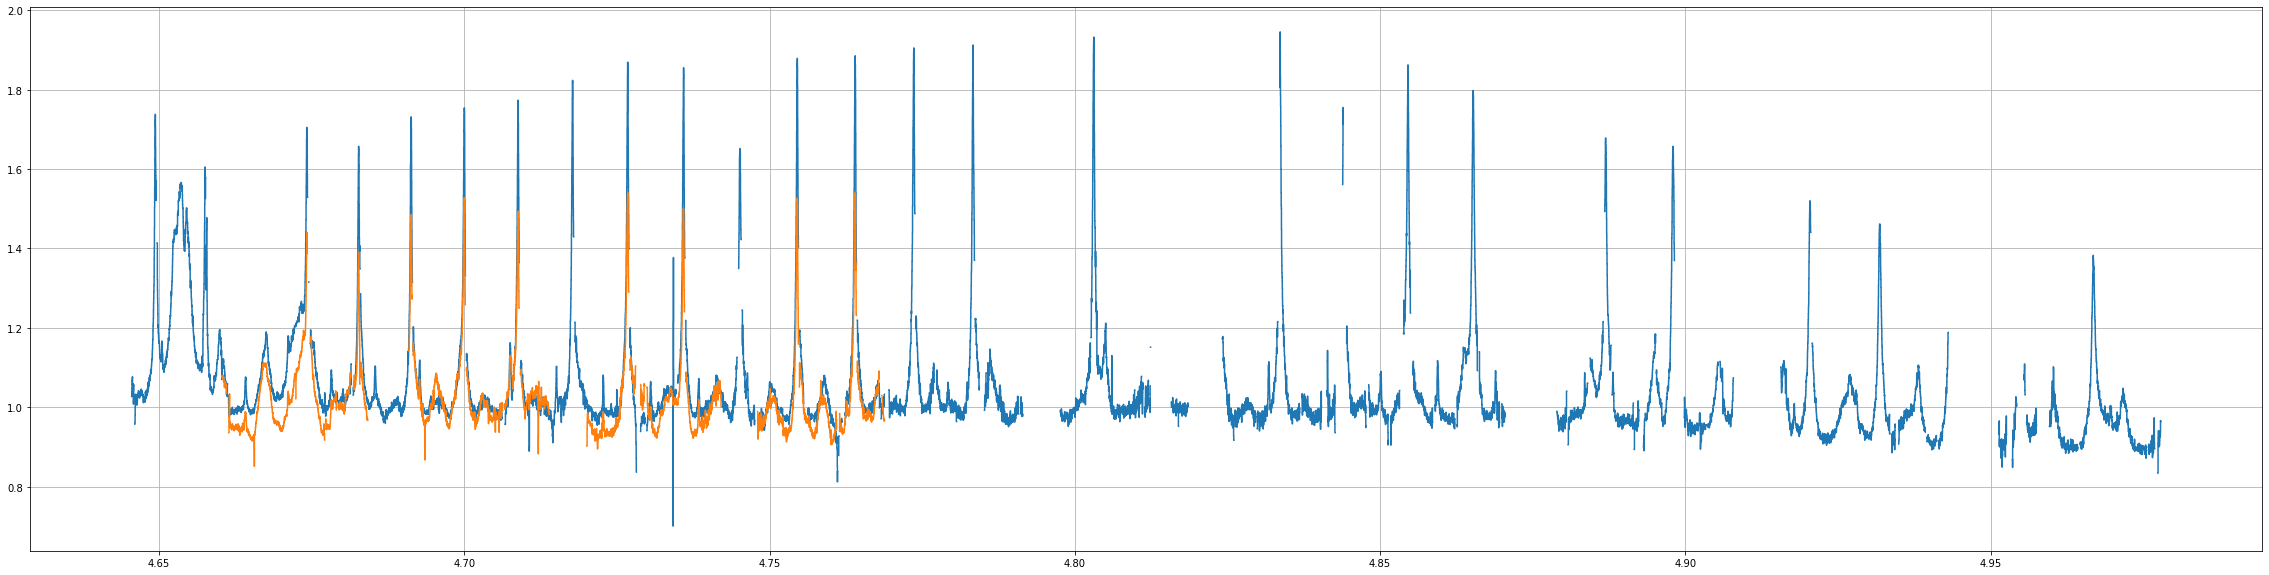

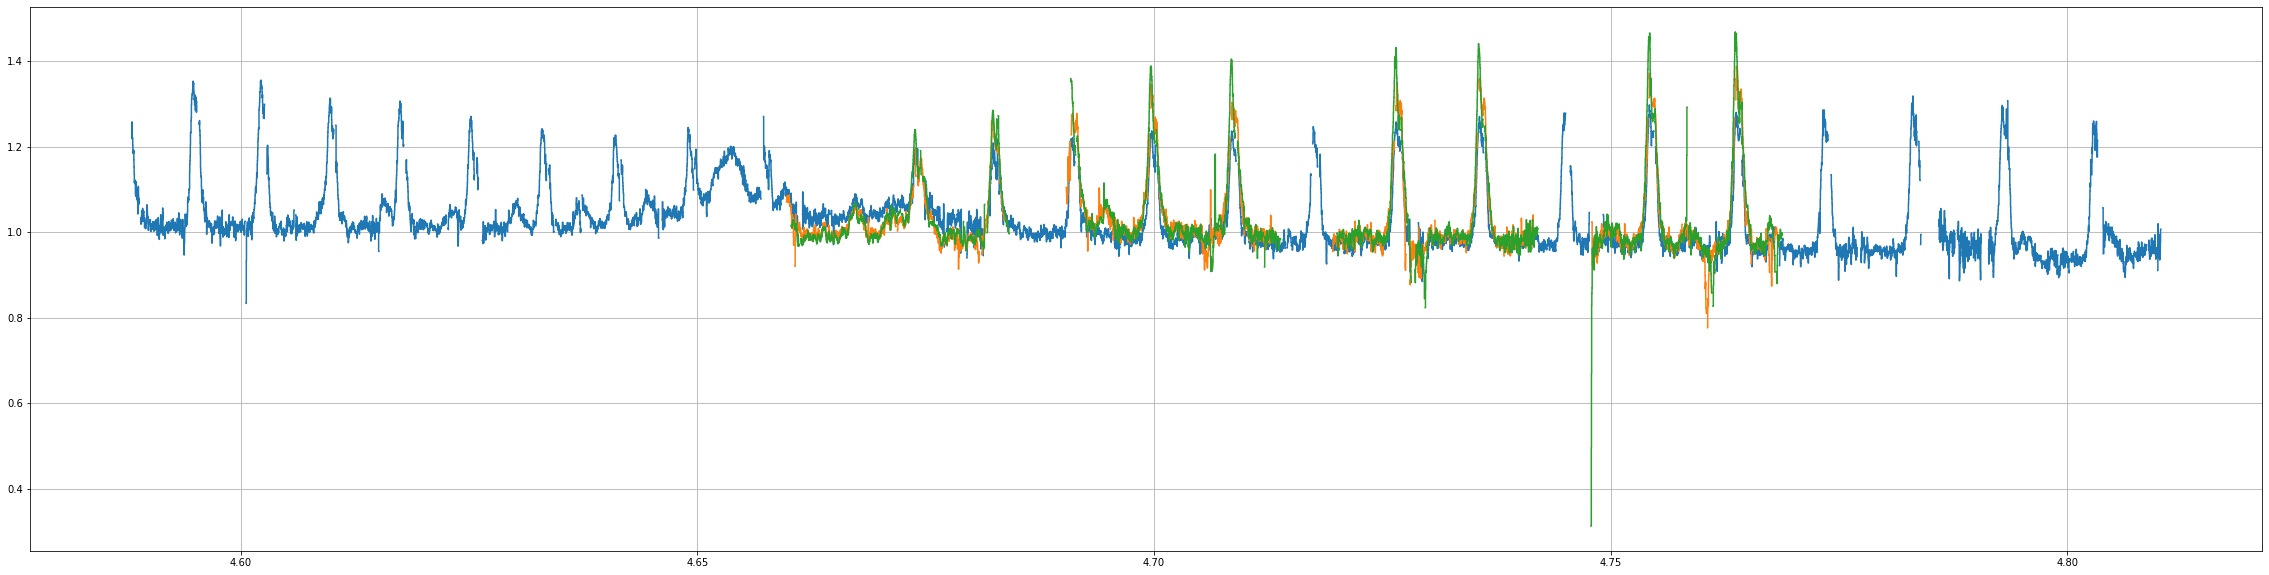

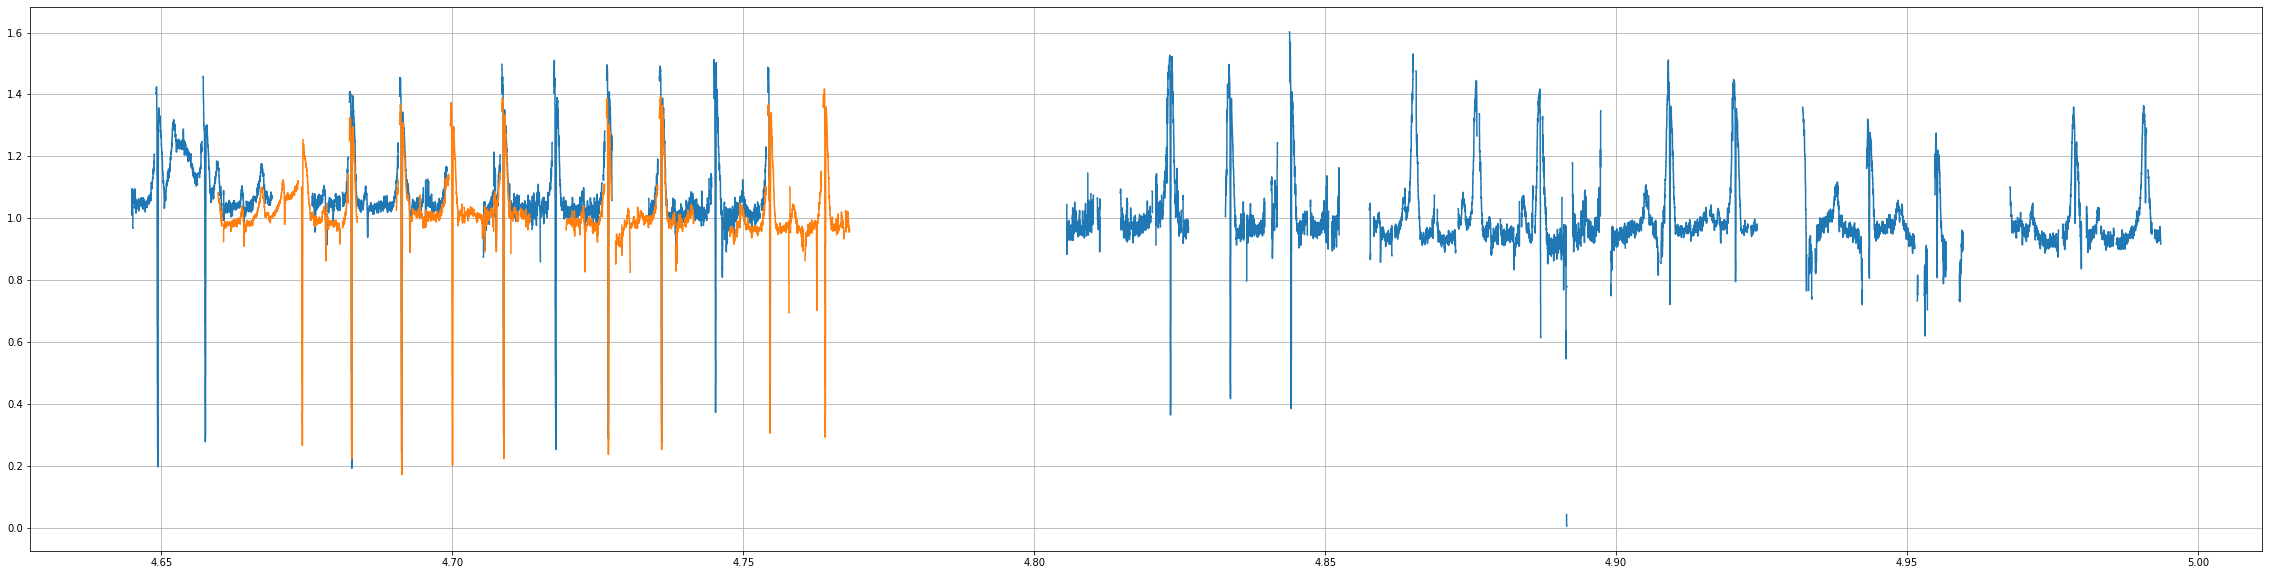

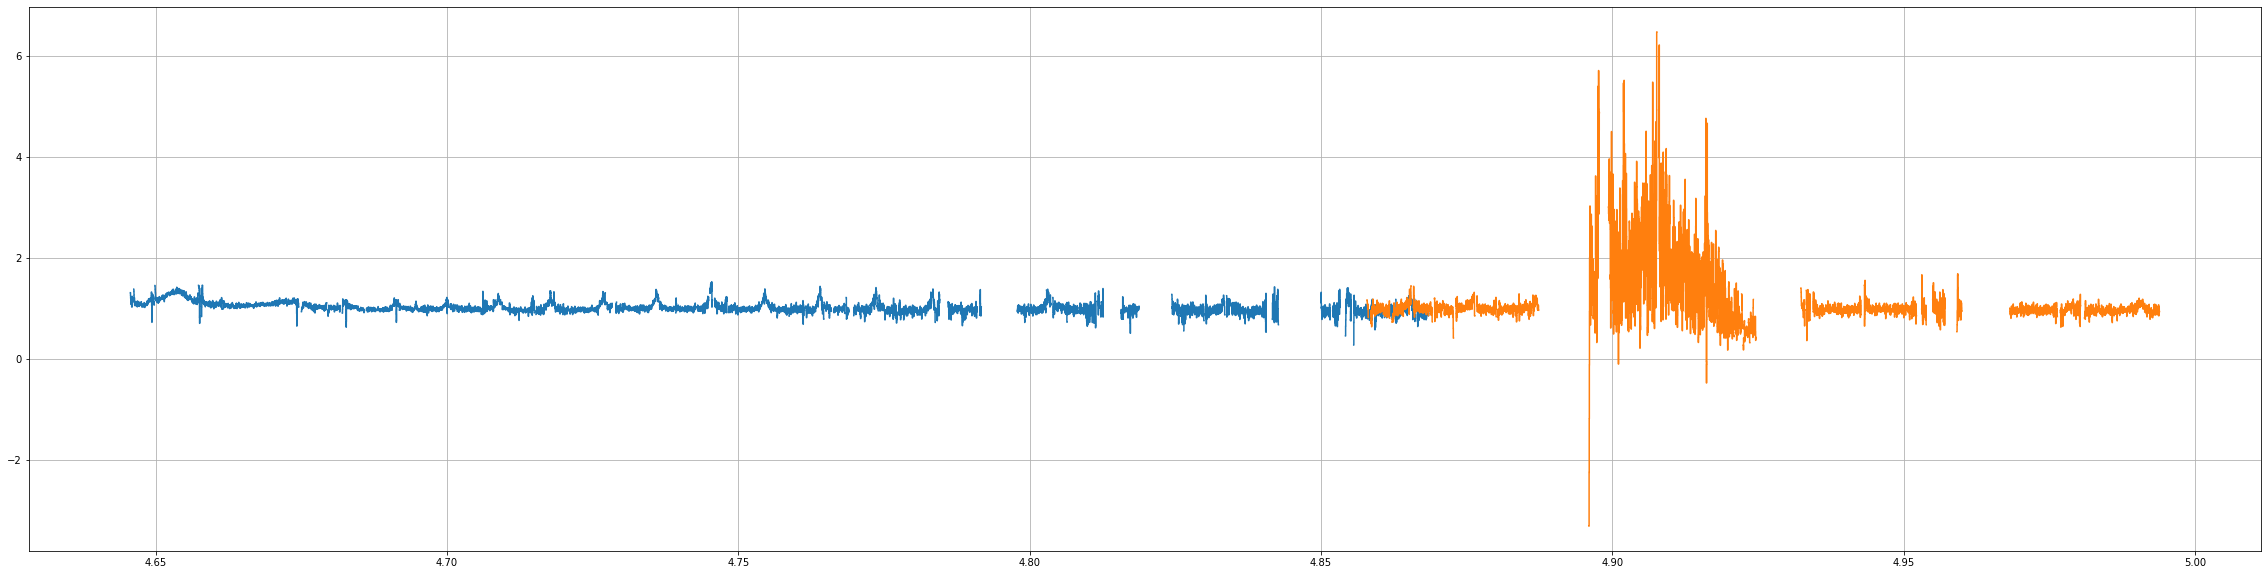

In [22]:
  ##disk names
names = ['RULup_M_','GQLup_M_','CWTau_M_','DG-CrA_M_']        

##pulls files from folder
for i in range(len(names)):
    disks = glob.glob('/Users/abern/Downloads/CO_spectra_fits/{0}*.fits'.format(names[i]))  
    
    f = []
    wv = []
    fl = []
    err = []
    spec = []
    
    for each in range(len(disks)): 
         ##create Spectrum1D
        fitsfile = disks[each]                           
        f_t = fits.open(fitsfile)
        f.append(f_t[1])
        hdu = f[each]
        hdu.header
        specdata = f[each].data[0]
        print(specdata)
        
        wv.append(specdata[0] * 1e-3 * u.micron)        #Data orignially in nm
        fl.append(specdata[1] * u.Unit('erg cm-2 s-1')) #* 10**-17 * u.Unit('erg cm-2 s-1')    
        err.append(StdDevUncertainty(specdata[2], unit = 'erg cm-2 s-1'))
        spec.append(Spectrum1D(flux=fl[each], spectral_axis=wv[each], uncertainty=err[each]))
        
        ##plot and save the data
    f, ax = plt.subplots(figsize = (40,10))
    if len(disks) == 2:
        ax.step(spec[0].spectral_axis, spec[0].flux, spec[1].spectral_axis, spec[1].flux)
    elif len(disks) == 3:
        ax.step(spec[0].spectral_axis, spec[0].flux, spec[1].spectral_axis, spec[1].flux,\
                spec[2].spectral_axis, spec[2].flux)
    elif len(disks) == 4:
        ax.step(spec[0].spectral_axis, spec[0].flux, spec[1].spectral_axis, spec[1].flux,\
                spec[2].spectral_axis, spec[2].flux, spec[3].spectral_axis, spec[3].flux)
    else:
        print('Not in range')
    plt.grid(True)
    plt.savefig('/Users/abern/Documents/CO_disk_graphs/{0}.png'.format(names[i]))

In [1]:
from specutils import SpectralRegion

